# Figure 3. The ESCRT-III and autophagosome formation pathway. 

In [3]:
# Packages used within the code

import boolean2 as b2             # boolean2 is used to produced the model
import matplotlib.pyplot as plt   # matplotlib is used to produce the grpahs of the model
import re                         # re was used during personal code checks of the model but currently is not used.

CARGO [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
ACTG1 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
WLS [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
RUBCN [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
CHMP2B [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
AKT1 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
AKT2 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
CHMP2A [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
AP-2_COMPLEX [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
TXNDC5 [True, True, True, True, True, True, True, Tr

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_2
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_1
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_6
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_5
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_4
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
MTB
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_3
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
RAB7COMPLEX
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


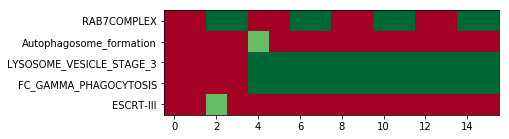

In [4]:
from JL_Mtb_model import model_definition

In [5]:
pathway_terms= """
ESXH
ESXG

HSG
STAM1
STAM2
MVB12A
VPS28
VPS37B

ESCRT-0

ESCRT-0_CARGO_COMPLEX

TSG101
VPS37A
VPS37C
VPS37D

ESCRT-I

ESCRT-I_CARGO_COMPLEX

SNF8
VPS25
VPS36

ESCRT-II

ESCRT-II_CARGO_COMPLEX

UBIQUINATED_CARGO

CHMP2A
CHMP3
CHMP48
ENSG00000249884

CHMP2B
CHMP4A
CHMP4C
VCP

ESCRT-III

ESCRT-III_CARGO_COMPLEX

VPS4A
VPS4B
VTA1

RV2074
UBXN6
NSFL1C

SVIP
ASPSCR1

GABARAP
GABARAPL2
MAP1LC3

GABARAPL1
MAP1LC3

LC3_PROTEINS

RUBCN

PIK3C3
BECLIN_1_COMPLEX

PHAGOPHORE

Autophagosome_formation
"""

In [6]:
pathway_terms = sorted(list(dict.fromkeys(pathway_terms.split("\n"))))[1:]

In [7]:
pathway_items = [] # drop any lines that don't contain a pathway relevant node
for item in model_definition.split("\n"):
    if item.startswith('# '):
#         print '\n' + item + '\n'
        pathway_items.append('\n' + item + '\n')
        continue 
    for term in pathway_terms: 
        if term in item:
#             print item
            pathway_items.append(item)
            break
    continue

In [8]:
model_definition_pathway = "\n".join(pathway_items)

In [9]:
print model_definition_pathway


# This first section is defining the inital state of every node in the system beggining with complexs and miscellaneous nodes

AP1G2_HGS_CHMP2A=False
ESCRT-0=False
ESCRT-I=False
ESCRT-II=False
ESCRT-III=False
ESCRT-0_CARGO_COMPLEX=False
ESCRT-I_CARGO_COMPLEX=False
ESCRT-II_CARGO_COMPLEX=False
ESCRT-III_CARGO_COMPLEX=False
VPS_VTA1=False
LC3_PROTEINS=False
Autophagosome_formation=False
PHAGOPHORE=False

# These are the hit proteins

CHMP2A=True #BC-2
CHMP2B=True #DKFZP564O123
VCP=False

# These are the TB proteins

ESXH=False
ESXG=False
RV2074=False

# Remaining proteins in network

UBIQUINATED_CARGO=True
ASPSCR1=Random
CHMP3=True
CHMP4A=True
CHMP4C=True
ENSG00000249884=True
GABARAP=True
GABARAPL1=True
GABARAPL2=True
MAP1LC3A=True
MAP1LC3B=True
MAP1LC3C=True
MVB12A=True
SNF8=True
STAM2=True
SVIP=Random
TSG101=True
VPS25=True
VPS28=True
VPS36=True
VPS37A=True
VPS37B=True
VPS37C=True
VPS37D=True
VPS4A=True
VPS4B=True
VTA1=True
PIK3C3=True
BECLIN_1_COMPLEX=True
UBXN6=False
NSFL1C=Random
R

In [14]:
# model helper functions

def run_model(definition, steps=15, mode='sync'): # run model under settings
    model = b2.Model(text=definition, mode=mode)
    model.initialize()
    model.iterate(steps=steps)
    return model
    
def print_model(model): # print node states
    for node in model.data:
        print node, model.data[node]

def plot_model(model, w=10, h=32): # plot node states 
    data = []
    labels = sorted(model.data.keys()) # nodes sorted alphabetically
    for label in labels:
        data.append(model.data[label])
        
    # figure
    plt.yticks(range(0, len(labels)), labels)
    plt.imshow(data ,cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
    plt.gcf().set_size_inches(w, h)
    
def plot_nodes(model, nodes, w=10, h=32): # plot node states 
    data = []
    labels = sorted(nodes) # nodes sorted alphabetically
    for label in labels:
        data.append(model.data[label])
        
    # figure
    plt.yticks(range(0, len(labels)), labels)
    plt.imshow(data ,cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
    plt.gcf().set_size_inches(w, h)

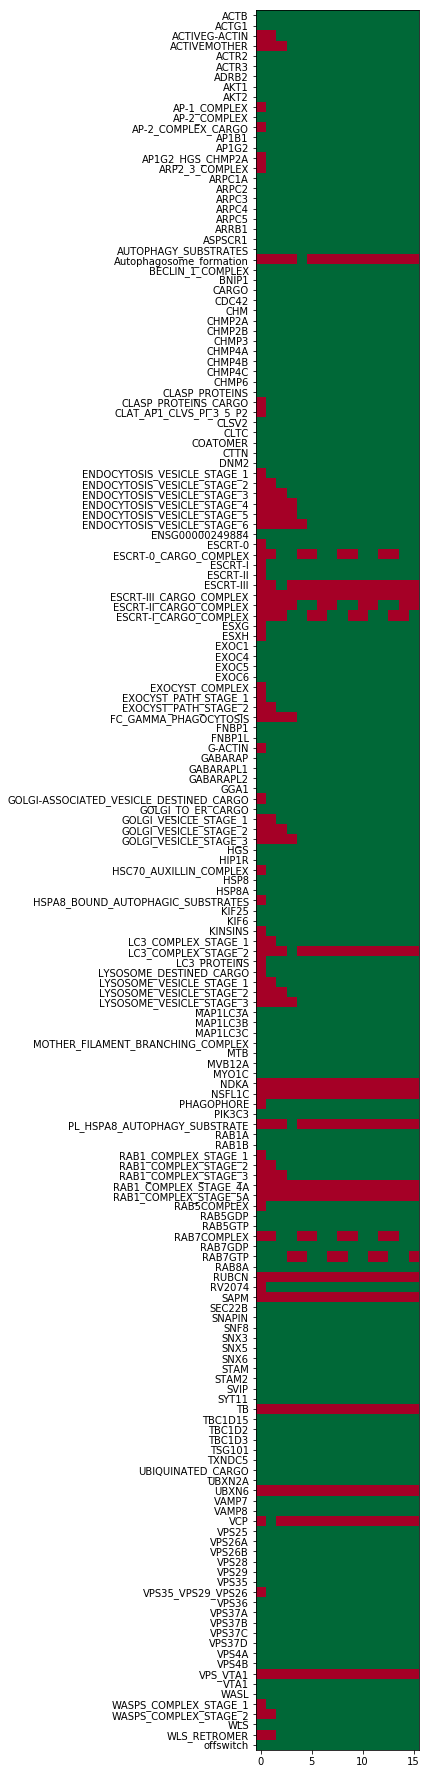

In [28]:
# test original model runs
model = run_model(model_definition)
plot_model(model)

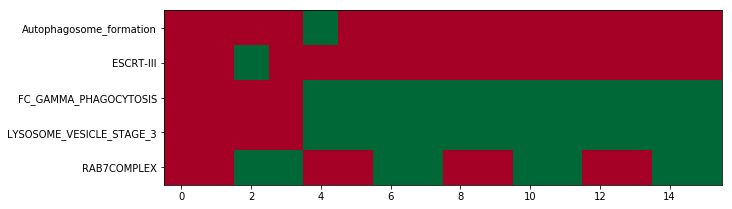

In [31]:
pathway_activation_nodes = ['RAB7COMPLEX', 
                            'Autophagosome_formation', 
                            'LYSOSOME_VESICLE_STAGE_3',
                            'FC_GAMMA_PHAGOCYTOSIS',
                            'ESCRT-III'
                           ]

plot_nodes(model, pathway_activation_nodes)

In [33]:
model = run_model(model_definition_pathway)
plot_model(model)

*** error: uninitialized nodes: ['STAM', 'VAMP7', 'VAMP8', 'CHMP4B', 'LC3_COMPLEX_STAGE_2', 'HGS', 'CLASP_PROTEINS_CARGO', 'ADRB2', 'SYT11', 'PL_HSPA8_AUTOPHAGY_SUBSTRATE', 'CLTC', 'MTB', 'AP-2_COMPLEX', 'AP1G2', 'LC3_COMPLEX_STAGE_1']


SystemExit: 

 Need to add unitialised nodes to pathway model
 Split model into model rules and nodes
 Write helper functions for initialising nodes and combining nodes and rules
 Initialise trafiicking hit terms
 